<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/Bias_and_Variance_L4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

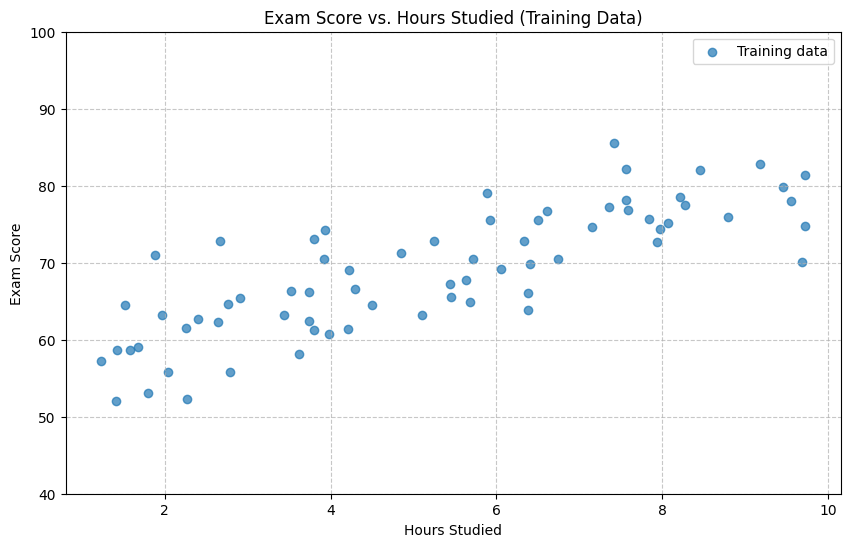

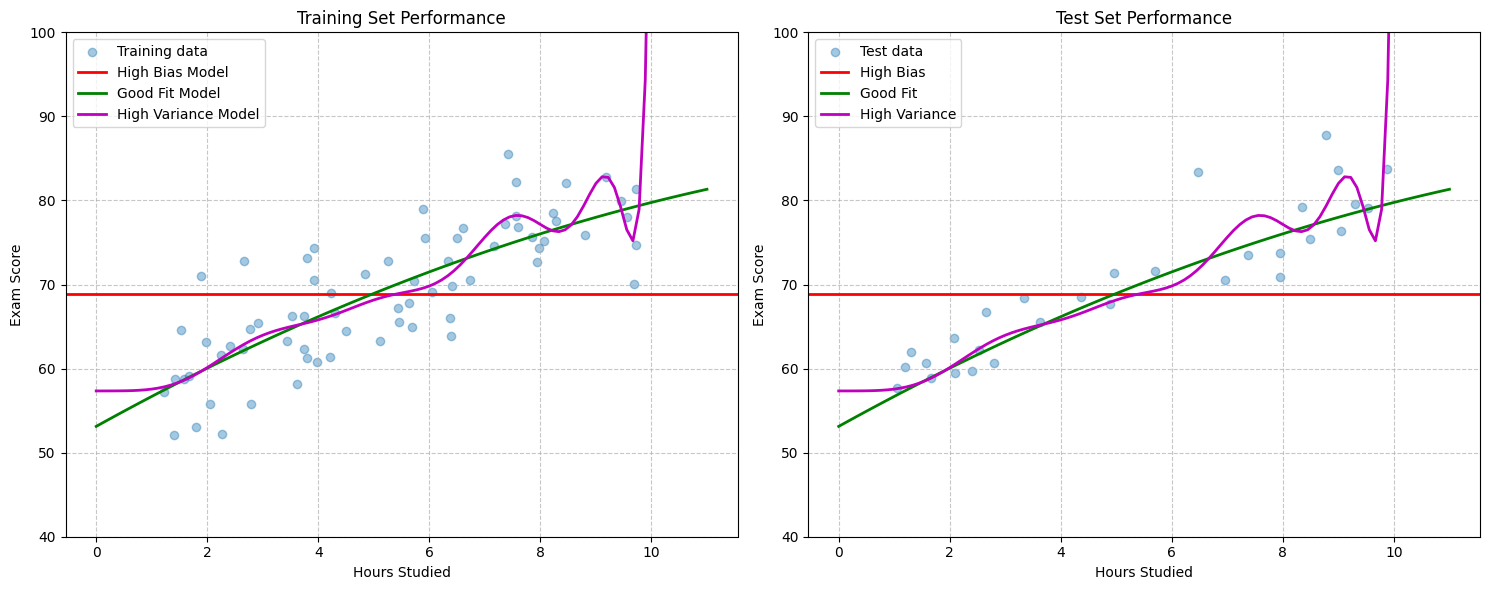

Model Performance on Training Data:
High Bias Model MSE: 64.23
Good Fit Model MSE: 22.07
High Variance Model MSE: 19.84

Model Performance on Test Data:
High Bias Model MSE: 74.66
Good Fit Model MSE: 14.07
High Variance Model MSE: 18.25


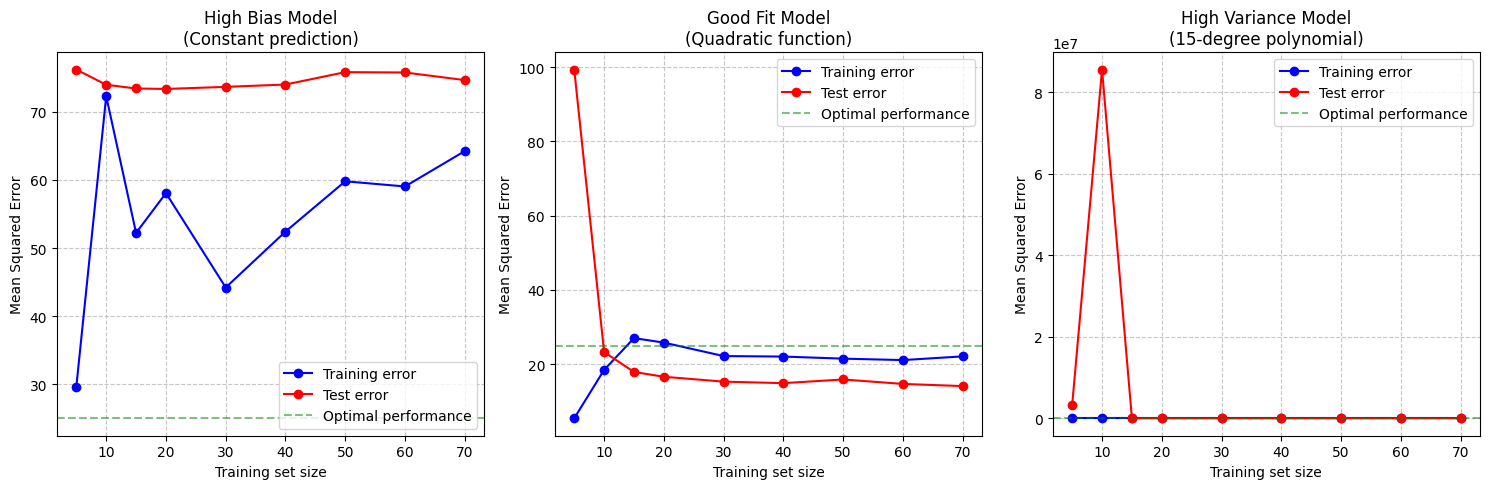

In [1]:
# Exam Score Prediction Based on Hours Studied
# This demonstrates bias vs. variance with a practical example

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create synthetic data: hours studied vs. exam score
np.random.seed(42)
hours_studied = np.random.uniform(1, 10, 100).reshape(-1, 1)

# True relationship is roughly quadratic with diminishing returns
# Score = 50 + 5*hours - 0.2*hours^2 + noise
true_scores = 50 + 5 * hours_studied.flatten() - 0.2 * hours_studied.flatten()**2 + np.random.normal(0, 5, 100)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    hours_studied, true_scores, test_size=0.3, random_state=42)

# Visualize the training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.7, label='Training data')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Exam Score vs. Hours Studied (Training Data)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(40, 100)
plt.legend()
plt.show()

# Let's fit three different models:

# 1. High Bias: Simple average (predicts same score regardless of hours)
mean_score = np.mean(y_train)
simple_pred_train = np.ones_like(y_train) * mean_score
simple_pred_test = np.ones_like(y_test) * mean_score

simple_train_mse = mean_squared_error(y_train, simple_pred_train)
simple_test_mse = mean_squared_error(y_test, simple_pred_test)

# 2. Good Fit: Quadratic model
quad_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
quad_model.fit(X_train, y_train)
quad_pred_train = quad_model.predict(X_train)
quad_pred_test = quad_model.predict(X_test)

quad_train_mse = mean_squared_error(y_train, quad_pred_train)
quad_test_mse = mean_squared_error(y_test, quad_pred_test)

# 3. High Variance: 15-degree polynomial
complex_model = make_pipeline(PolynomialFeatures(15), LinearRegression())
complex_model.fit(X_train, y_train)
complex_pred_train = complex_model.predict(X_train)
complex_pred_test = complex_model.predict(X_test)

complex_train_mse = mean_squared_error(y_train, complex_pred_train)
complex_test_mse = mean_squared_error(y_test, complex_pred_test)

# Create a range of values for smoother curve visualization
x_range = np.linspace(0, 11, 100).reshape(-1, 1)

# Plot the three models
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.4, label='Training data')
plt.axhline(y=mean_score, color='r', linestyle='-',
            linewidth=2, label=f'High Bias Model')
plt.plot(x_range, quad_model.predict(x_range), 'g-',
         linewidth=2, label=f'Good Fit Model')
plt.plot(x_range, complex_model.predict(x_range), 'm-',
         linewidth=2, label=f'High Variance Model')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Training Set Performance')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(40, 100)

# Test set visualization
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.4, label='Test data')
plt.axhline(y=mean_score, color='r', linestyle='-',
            linewidth=2, label=f'High Bias')
plt.plot(x_range, quad_model.predict(x_range), 'g-',
         linewidth=2, label=f'Good Fit')
plt.plot(x_range, complex_model.predict(x_range), 'm-',
         linewidth=2, label=f'High Variance')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Test Set Performance')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(40, 100)
plt.tight_layout()
plt.show()

# Print model performance metrics
print("Model Performance on Training Data:")
print(f"High Bias Model MSE: {simple_train_mse:.2f}")
print(f"Good Fit Model MSE: {quad_train_mse:.2f}")
print(f"High Variance Model MSE: {complex_train_mse:.2f}")
print("\nModel Performance on Test Data:")
print(f"High Bias Model MSE: {simple_test_mse:.2f}")
print(f"Good Fit Model MSE: {quad_test_mse:.2f}")
print(f"High Variance Model MSE: {complex_test_mse:.2f}")

# Now let's visualize how the learning curves would look
# We'll use different training set sizes to plot learning curves
training_sizes = [5, 10, 15, 20, 30, 40, 50, 60, 70]

# Function to compute errors for different training sizes
def compute_learning_curves(model_factory, X, y, training_sizes):
    # Split into final test set (30%) and potential training data (70%)
    X_potential_train, X_final_test, y_potential_train, y_final_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

    train_errors = []
    test_errors = []

    for size in training_sizes:
        # Use only a subset of the potential training data
        X_subset = X_potential_train[:size]
        y_subset = y_potential_train[:size]

        # Create and train the model
        model = model_factory()
        model.fit(X_subset, y_subset)

        # Calculate errors
        train_pred = model.predict(X_subset)
        test_pred = model.predict(X_final_test)

        train_error = mean_squared_error(y_subset, train_pred)
        test_error = mean_squared_error(y_final_test, test_pred)

        train_errors.append(train_error)
        test_errors.append(test_error)

    return train_errors, test_errors

# Define model factories
def make_constant_model():
    # Simple average model (constant prediction)
    return make_pipeline(
        PolynomialFeatures(0),  # Only intercept
        LinearRegression()
    )

def make_quadratic_model():
    return make_pipeline(
        PolynomialFeatures(2),
        LinearRegression()
    )

def make_complex_model():
    return make_pipeline(
        PolynomialFeatures(15),
        LinearRegression()
    )

# Compute learning curves
const_train_errors, const_test_errors = compute_learning_curves(
    make_constant_model, hours_studied, true_scores, training_sizes)

quad_train_errors, quad_test_errors = compute_learning_curves(
    make_quadratic_model, hours_studied, true_scores, training_sizes)

complex_train_errors, complex_test_errors = compute_learning_curves(
    make_complex_model, hours_studied, true_scores, training_sizes)

# Plot learning curves
plt.figure(figsize=(15, 5))

# High Bias Model
plt.subplot(1, 3, 1)
plt.plot(training_sizes, const_train_errors, 'o-', color='blue', label='Training error')
plt.plot(training_sizes, const_test_errors, 'o-', color='red', label='Test error')
plt.axhline(y=25, linestyle='--', color='green', alpha=0.5, label='Optimal performance')
plt.title('High Bias Model\n(Constant prediction)')
plt.xlabel('Training set size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Just Right Model
plt.subplot(1, 3, 2)
plt.plot(training_sizes, quad_train_errors, 'o-', color='blue', label='Training error')
plt.plot(training_sizes, quad_test_errors, 'o-', color='red', label='Test error')
plt.axhline(y=25, linestyle='--', color='green', alpha=0.5, label='Optimal performance')
plt.title('Good Fit Model\n(Quadratic function)')
plt.xlabel('Training set size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# High Variance Model
plt.subplot(1, 3, 3)
plt.plot(training_sizes, complex_train_errors, 'o-', color='blue', label='Training error')
plt.plot(training_sizes, complex_test_errors, 'o-', color='red', label='Test error')
plt.axhline(y=25, linestyle='--', color='green', alpha=0.5, label='Optimal performance')
plt.title('High Variance Model\n(15-degree polynomial)')
plt.xlabel('Training set size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# YOU CAN EXPERIMENT WITH THIS CODE:
# 1. Try changing the degree of the polynomial in make_complex_model()
# 2. Change the noise level in the true_scores calculation
# 3. Try different training_sizes values
# 4. Add regularization to the models to see its effect